IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       5.0 -0.062369   0.010979    0.750795   0.121811          0.0   
1       6.0 -0.037089   0.027304    1.484140   0.169124         69.0   
2      83.0 -0.015371   0.058956    1.821410   0.243015         85.0   
3      32.0 -0.044407   0.018332   -0.786985   0.142325         77.0   
4      33.0 -0.120684   0.039188   -0.434778   0.231627         82.0   
...     ...       ...        ...         ...        ...          ...   
1344   42.0 -0.068937   0.010575    0.867958   0.123696          0.0   
1345    9.0 -0.125384   0.041235   -1.535433   0.238415         62.0   
1346   52.0 -0.055604   0.026571   -0.931473   0.172037          0.0   
1347   65.0 -0.066300   0.011317    0.541562   0.125240          0.0   
1348   43.0 -0.043647   0.016569   -0.501291   0.135765        121.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0           100.0   11.758881    2.699322  0.024816  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.062369   0.010979    0.750795   0.121811          0.0        100.0   
1    -0.037089   0.027304    1.484140   0.169124         69.0         87.0   
2    -0.015371   0.058956    1.821410   0.243015         85.0         83.0   
3    -0.044407   0.018332   -0.786985   0.142325         77.0         75.0   
4    -0.120684   0.039188   -0.434778   0.231627         82.0         58.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.068937   0.010575    0.867958   0.123696          0.0         92.0   
1345 -0.125384   0.041235   -1.535433   0.238415         62.0         81.0   
1346 -0.055604   0.026571   -0.931473   0.172037          0.0         79.0   
1347 -0.066300   0.011317    0.541562   0.125240          0.0        105.0   
1348 -0.043647   0.016569   -0.501291   0.135765        121.0         98.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.036262   0.010126    1.848547    0.10685         76.0        101.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    5.003781    4.188677 -0.009845   0.005903  ...       7639.043494   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.402109          0.444476           0.025273          3.466665   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               140.0               141.0          21.097401   

     amp2(Curr(ESC_5))  Guasto  
340           9.792697       1  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.062369   0.010979    0.750795   0.121811          0.0        100.0   
1    -0.037089   0.027304    1.484140   0.169124         69.0         87.0   
2    -0.015371   0.058956    1.821410   0.243015         85.0         83.0   
3    -0.044407   0.018332   -0.786985   0.142325         77.0         75.0   
4    -0.120684   0.039188   -0.434778   0.231627         82.0         58.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.068937   0.010575    0.867958   0.123696          0.0         92.0   
1345 -0.125384   0.041235   -1.535433   0.238415         62.0         81.0   
1346 -0.055604   0.026571   -0.931473   0.172037          0.0         79.0   
1347 -0.066300   0.011317    0.541562   0.125240          0.0        105.0   
1348 -0.043647   0.016569   -0.501291   0.135765        121.0         98.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.062369   0.010979    0.750795   0.121811     0.000000   100.000000   
1    -0.037089   0.027304    1.484140   0.169124    69.000000    87.000000   
2    -0.015371   0.058956    1.821410   0.243015    85.000000    83.000000   
3    -0.044407   0.018332   -0.786985   0.142325    77.000000    75.000000   
4    -0.120684   0.039188   -0.434778   0.231627    82.000000    58.000000   
...        ...        ...         ...        ...          ...          ...   
1618  0.005934   0.007529   -0.446360   0.086858     0.000000    93.078057   
1619 -0.114701   0.040037   -0.468996   0.230400    53.621175    60.955324   
1620 -0.140863   0.039967   -1.483741   0.244356    91.000000    90.000000   
1621 -0.032979   0.010025    1.988404   0.105300    73.415811    97.415811   
1622 -0.039459   0.010084    1.788963   0.107785    98.434258    76.585644   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=45)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=45, score_func=<function f_regression at 0x000002168B29D120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False  True False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False  True False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.258853
28         freq1(AccX)  3.507937
12         freq1(GyrY)  3.186045
11           RMS(GyrY)  2.826355
9            var(GyrY)  2.680374
93   freq2(RPM(ESC_1))  2.620492
92   freq1(RPM(ESC_1))  2.615810
153   kurt(RPM(ESC_5))  2.606723
14          amp1(GyrY)  2.381420
159   var(Curr(ESC_5))  2.299609
104     <>(RPM(ESC_2))  1.936192
8             <>(GyrY)  1.834284
152    var(RPM(ESC_5))  1.768211
78    amp1(RPM(ESC_0))  1.744757
107    RMS(RPM(ESC_2))  1.618645
32            <>(AccY)  1.613277
22          amp1(GyrZ)  1.506744
62         amp1(Pitch)  1.205680
76   freq1(RPM(ESC_0))  1.130400
30          amp1(AccX)  1.105120
17           var(GyrZ)  1.042999
80     <>(Curr(ESC_0))  1.012883
77   freq2(RPM(ESC_0))  0.979939
19           RMS(GyrZ)  0.968025
4          freq1(GyrX)  0.936181
57          var(Pitch)  0.881086
156   amp1(RPM(ESC_5))  0.789082
81    var(Curr(ESC_0))  0.727446
83    RMS(Curr(ESC_0))  0.611979
97    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.062369   0.010979     0.000000  0.024816   0.007271   0.088692   
1    -0.037089   0.027304    69.000000 -0.016890   0.008533   0.093778   
2    -0.015371   0.058956    85.000000 -0.040703   0.034748   0.190592   
3    -0.044407   0.018332    77.000000  0.013606   0.003110   0.057328   
4    -0.120684   0.039188    82.000000  0.042409   0.010471   0.110643   
...        ...        ...          ...       ...        ...        ...   
1618  0.005934   0.007529     0.000000  0.016785   0.005799   0.077880   
1619 -0.114701   0.040037    53.621175  0.046456   0.010474   0.112267   
1620 -0.140863   0.039967    91.000000  0.027006   0.008763   0.097314   
1621 -0.032979   0.010025    73.415811 -0.009218   0.005963   0.077677   
1622 -0.039459   0.010084    98.434258 -0.010621   0.005776   0.076653   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  var(Curr(ESC_2))  \
0       99.000000    3.703369   

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.036262   0.010126         76.0 -0.009845   0.005903   0.077369   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  var(Curr(ESC_2))  \
340        119.0    8.513245    3.186687   0.004241  ...          0.278985   

     freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  var(RPM(ESC_5))  \
340               76.0               75.0         -0.682528    910132.822962   

     kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  amp2(RPM(ESC_5))  <>(Curr(ESC_5))  \
340         -0.561722      12133.636498       7639.043494         3.402109   

     var(Curr(ESC_5))  
340          0.444476  

[1 rows x 45 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0    -0.062369   0.010979     0.000000  0.024816   0.003699   -1.020069   
1    -0.037089   0.027304    69.000000 -0.016890   0.006978   -1.010593   
2    -0.015371   0.058956    85.000000 -0.040703   0.017543   -1.506481   
3    -0.044407   0.018332    77.000000  0.013606   0.006178   -1.550802   
4    -0.120684   0.039188    82.000000  0.042409   0.004560   -1.149325   
...        ...        ...          ...       ...        ...         ...   
1618  0.005934   0.007529     0.000000  0.016785   0.005879   -0.910790   
1619 -0.114701   0.040037    53.621175  0.046456   0.004490   -0.989528   
1620 -0.140863   0.039967    91.000000  0.027006   0.005528   -1.149094   
1621 -0.032979   0.010025    73.415811 -0.009218   0.004356   -1.265170   
1622 -0.039459   0.010084    98.434258 -0.010621   0.004118   -1.190375   

      RMS(GyrZ)  amp1(GyrZ)  amp1(AccZ)  kurt(RPM(ESC_1))  var(Curr(ESC_1))  \
0      0.106471    4

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.036262   0.010126         76.0 -0.009845   0.004241   -1.227125   

     RMS(GyrZ)  amp1(GyrZ)  amp1(AccZ)  kurt(RPM(ESC_1))  var(Curr(ESC_1))  \
340   0.108891    4.838767   239.89222         -1.646231            0.5414   

     amp2(Curr(ESC_1))  <>(RPM(ESC_2))  var(Curr(ESC_2))  kurt(RPM(ESC_4))  \
340          13.777385      5204.92654          0.278985         -0.682528   

     amp2(RPM(ESC_5))  
340       7639.043494  


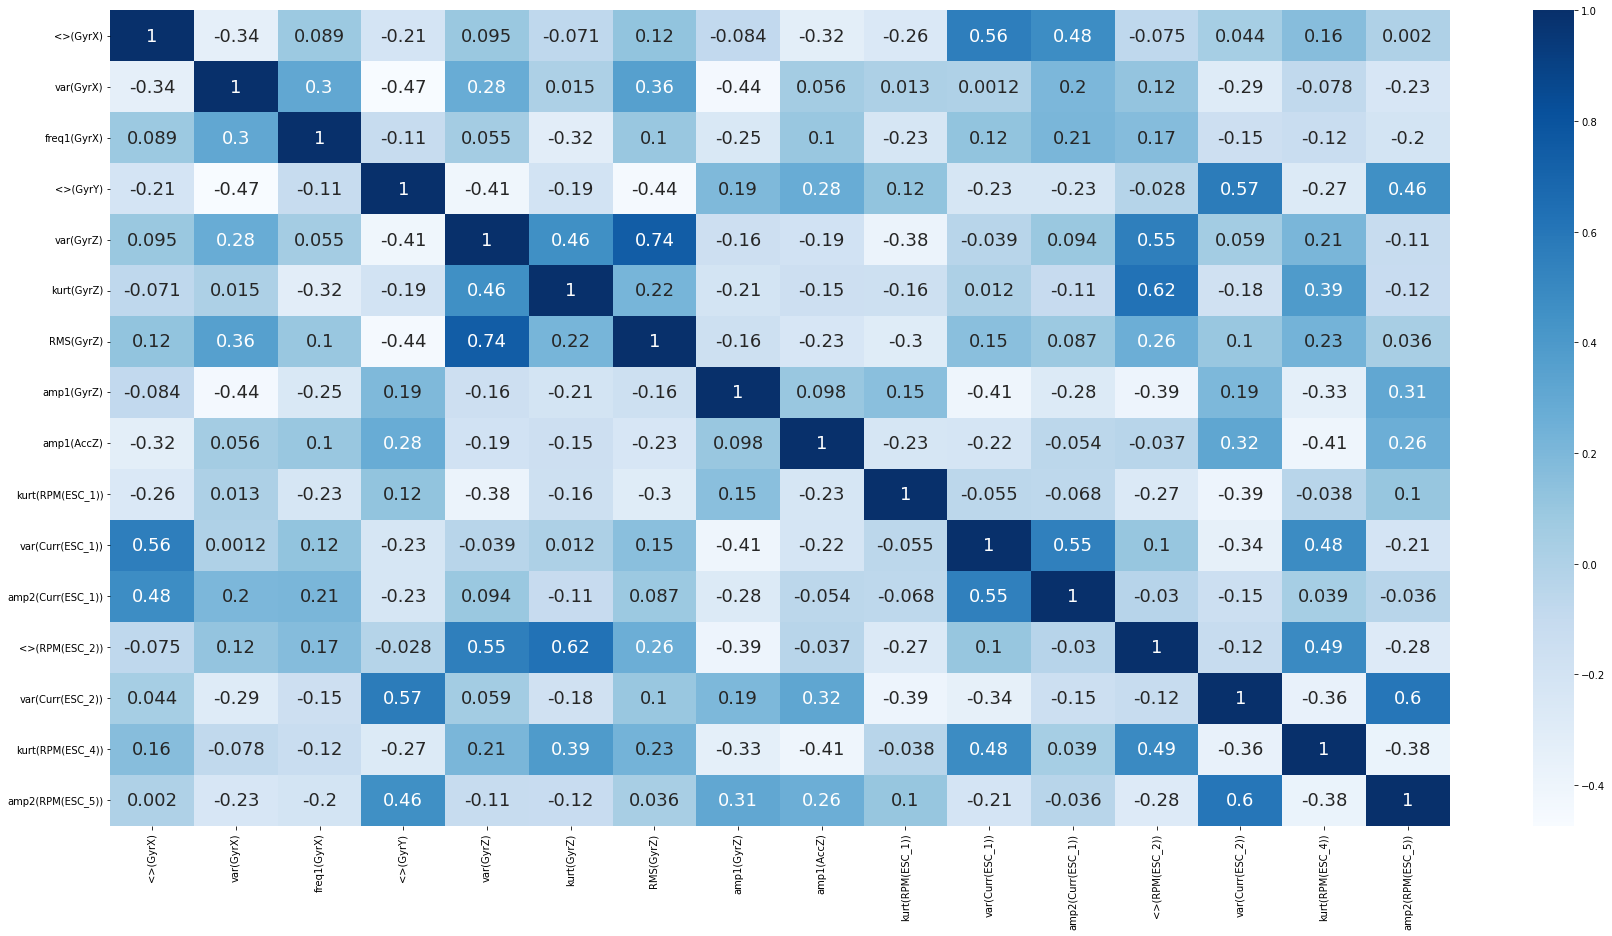

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 16)
(325, 16)
(1298, 1)
(325, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [23]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.68846154 0.66153846 0.75769231 0.73745174 0.6988417 ]
Accuracy: 0.69 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.5        0.50384615 0.59615385 0.5019305  0.51351351]
Accuracy: 0.5 	 ---> SVC 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.66538462 0.65384615 0.65       0.69111969 0.64864865]
Accuracy: 0.59 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.65769231 0.53461538 0.63461538 0.64864865 0.47490347]
Accuracy: 0.53 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


### Matrici di confusione

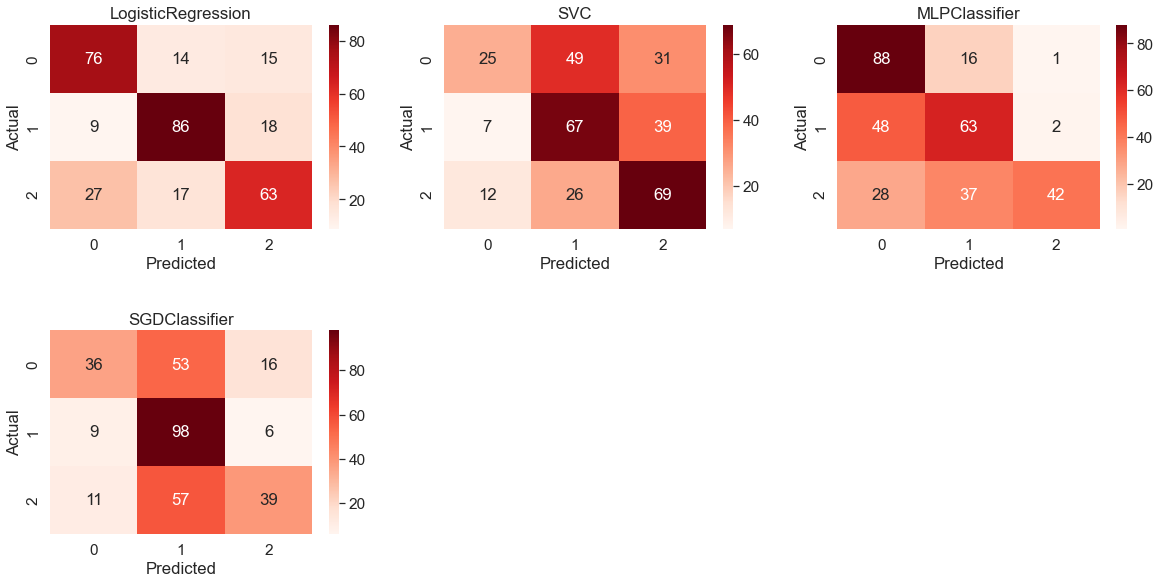

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation score

Text(0.5, 1.0, 'Cross validation scores')

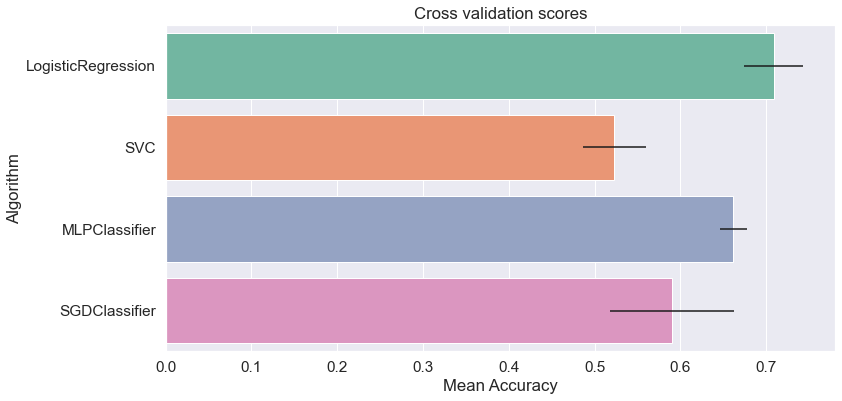

In [25]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [26]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       105
           1       0.74      0.76      0.75       113
           2       0.66      0.59      0.62       107

    accuracy                           0.69       325
   macro avg       0.69      0.69      0.69       325
weighted avg       0.69      0.69      0.69       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.24      0.34       105
           1       0.47      0.59      0.53       113
           2       0.50      0.64      0.56       107

    accuracy                           0.50       325
   macro avg       0.51      0.49      0.47       325
weighted avg       0.51      0.50      0.48       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.84      0.65       105
           1       0.54